1. Enter the `bash` folder within the downloaded `lts-exp` repository and then:

    -   Make all scripts executable by executing `chmod +x *.sh`.

    -   Update `prepare-all.sh` as follows:

        -   Update `TRI_VISUALIZATION_EXP` as the downloaded path of this `lts-exp` repository.

        -   Update `HOME_PATH` as an **empty** folder where you want the experiments to be executed.

    -   Run `prepare-all.sh` and then the folder at `HOME_PATH` will be ready for experiments. After this step is completed, "finish" will be printed on the screen.
2. Enter the folder at `HOME_PATH`, and run experiments using `nohup ./run-[datasetName]-efficiency-exp.sh 2>&1 &`, where `[datasetName]` is `Qloss`/`Pyra1`/`WindSpeed`/`RTD`. The running logs are saved in nohup.out, which can be checked by the command: `tail nohup.out`.
3. When the experiment script finishes running ("ALL FINISHED!" appears in nohup.out), the corresponding experimental results are in `HOME_PATH/res-[datasetName]-efficiency.csv`. 
4. In the result csv, counting from 1, the No.3 column is the query latency of `MinMax`, the No.8 column is the query latency of `M4`, the No.13 column is the query latency of `LTTB`, the No.18 column is the query latency of `MinMaxLTTB`, the No.23 column is the query latency of `ILTS`, the No.28 column is the query latency of `OM3`.
5. Copy all the `res-[datasetName]-efficiency.csv` to the `efficiencyResults` directory, and run the following code to plot results as in fig14 & 15.

In [1]:
from myfuncs import *

names=["Qloss","Pyra1","WindSpeed","RTD"]

titleList=[
    '(a) Qloss',
    '(b) Pyra1',
    '(c) WindSpeed',
    '(d) RTD'
]

font=18
lw=2.5
slw=1
ms=9
columnspacing=0.9
handletextpad=0.5

C:\Users\admin\AppData\Local\Temp\ipykernel_4324\850578458.py:58: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


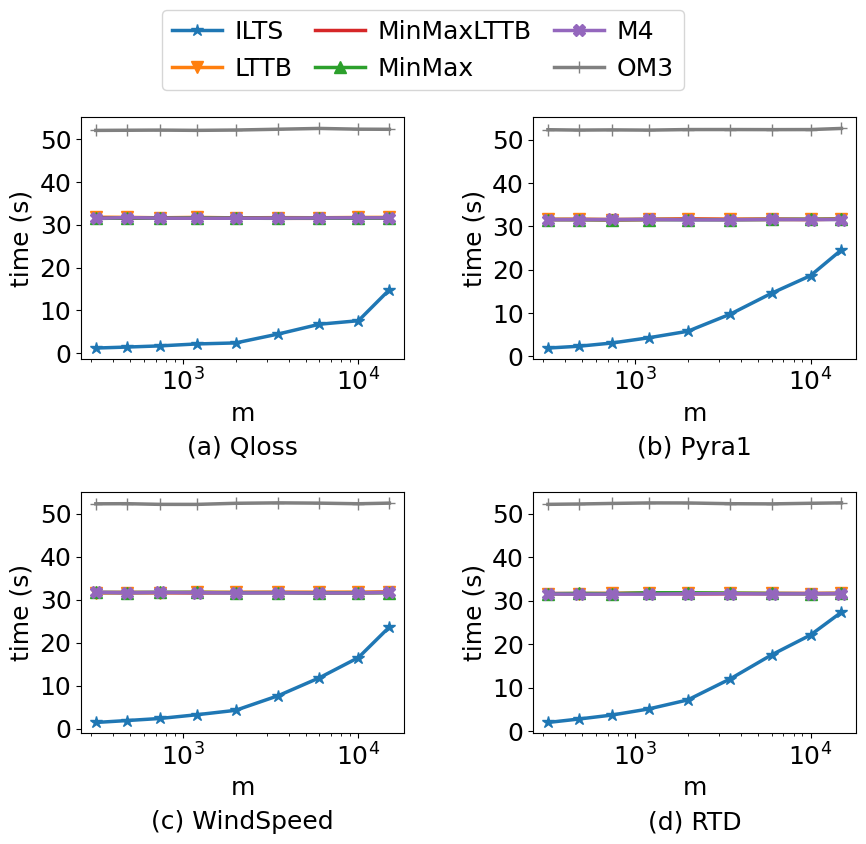

In [3]:
resName="efficiencyResults"

b1="{}/res-Qloss-efficiency.csv".format(resName)
b2="{}/res-Pyra1-efficiency.csv".format(resName)
b3="{}/res-WindSpeed-efficiency.csv".format(resName)
b4="{}/res-RTD-efficiency.csv".format(resName)
bList=[b1,b2,b3,b4]

from textwrap import wrap

fig, axs = plt.subplots(2,2,figsize=(10,8))
ax1=axs[0,0]
ax2=axs[0,1]
ax3=axs[1,0]
ax4=axs[1,1]
axes=[ax1,ax2,ax3,ax4]

# Remove space between axes
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.55)

titlepos=-0.43
#########################################
for i in range(len(titleList)):
    plt.sca(axes[i])

    df=pd.read_csv(bList[i],header=0)
    m=df.iloc[:,0]
    
    minmax=df.iloc[:,2].div(1000000000) # ns to s
    m4=df.iloc[:,7].div(1000000000) # ns to s
    lttb=df.iloc[:,12].div(1000000000) # ns to s
    minmaxlttb=df.iloc[:,17].div(1000000000) # ns to s
    ilts=df.iloc[:,22].div(1000000000) # ns to s
    om3=df.iloc[:,27].div(1000000000) # ns to s
    
    plt.plot(m,ilts,marker=markersmap.get('ILTS'),markersize=ms,linewidth=lw,color=colorsmap.get('ILTS'),zorder=1000)
    plt.plot(m,lttb,marker=markersmap.get('LTTB'),markersize=ms,linewidth=lw,color=colorsmap.get('LTTB'))
    plt.plot(m,minmaxlttb,marker=markersmap.get('MinMaxILTS'),markersize=ms,linewidth=lw,color=colorsmap.get('MinMaxLTTB'))
    
    plt.plot(m,minmax,marker=markersmap.get('MinMax'),markersize=ms,linewidth=lw,color=colorsmap.get('MinMax'))
    plt.plot(m,m4,marker=markersmap.get('M4'),markersize=ms,linewidth=lw,color=colorsmap.get('M4'))
    plt.plot(m,om3,marker=markersmap.get('OM3'),markersize=ms,linewidth=lw,color=colorsmap.get('OM3'))

    plt.xlabel("m",fontsize=font)
    plt.ylabel("time (s)", fontsize=font)

    plt.xscale("log")

    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.title(titleList[i],y=titlepos,fontsize=font)
    
###############################
labels=["ILTS","LTTB","MinMaxLTTB","MinMax","M4","OM3"]
fig.legend(fontsize=font, labels=labels, ncol=3,bbox_to_anchor=(0.467,1.03), loc='upper center',\
           columnspacing=columnspacing,handletextpad=handletextpad)
fig.show()

2000


C:\Users\admin\AppData\Local\Temp\ipykernel_4324\105064128.py:105: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


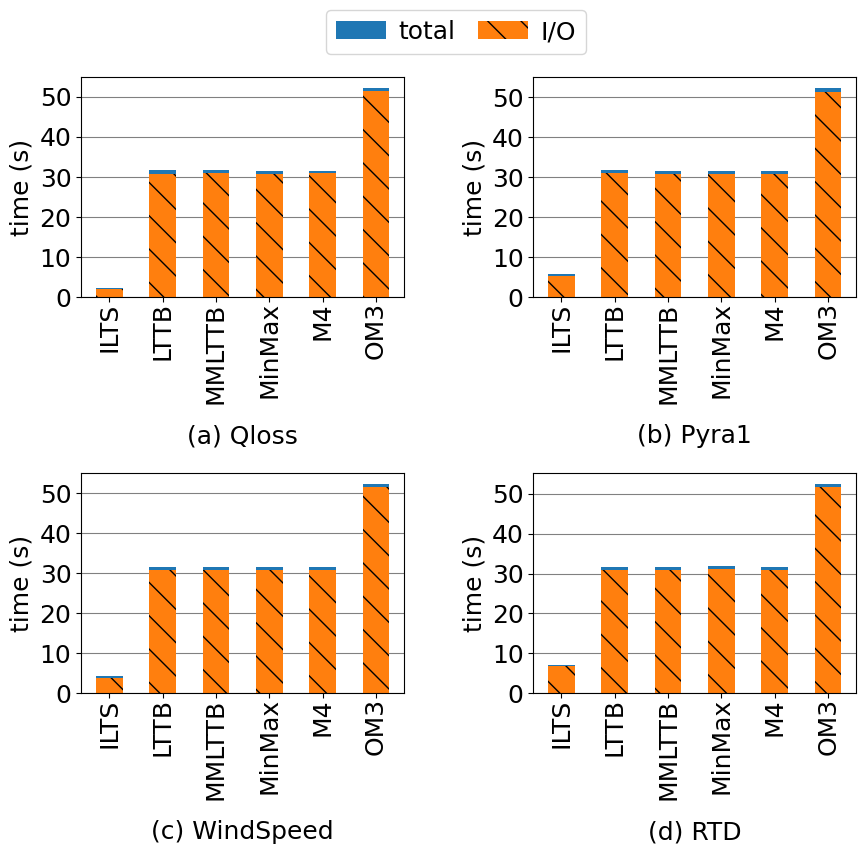

In [4]:
Nout=4
print(m[Nout])
    
titlepos=-0.7

fig, axs = plt.subplots(2,2,figsize=(10,8))
ax1=axs[0,0]
ax2=axs[0,1]
ax3=axs[1,0]
ax4=axs[1,1]
axes=[ax1,ax2,ax3,ax4]

# Remove space between axes
fig.subplots_adjust(wspace=0.4)
fig.subplots_adjust(hspace=0.8)

methods=np.array(["ILTS","LTTB","MMLTTB","MinMax","M4","OM3"])

for i in range(len(titleList)):
    plt.sca(axes[i])
    
    # read res
    df=pd.read_csv(bList[i],header=0)
    n=df.iloc[:,0]

    minmax_t=df.iloc[:,2].div(1000000000) # ns to s
    minmax_metadata_t=df.iloc[:,3].div(1000000000) # ns to s
    minmax_chunk_t=df.iloc[:,4].div(1000000000) # ns to s
    minmax_chunkNum=df.iloc[:,5]
    minmax_pointNum=df.iloc[:,6]

    m4_t=df.iloc[:,7].div(1000000000) # ns to s
    m4_metadata_t=df.iloc[:,8].div(1000000000) # ns to s
    m4_chunk_t=df.iloc[:,9].div(1000000000) # ns to s
    m4_chunkNum=df.iloc[:,10]
    m4_pointNum=df.iloc[:,11]

    lttb_t=df.iloc[:,12].div(1000000000) # ns to s
    lttb_metadata_t=df.iloc[:,13].div(1000000000) # ns to s
    lttb_chunk_t=df.iloc[:,14].div(1000000000) # ns to s
    lttb_chunkNum=df.iloc[:,15]
    lttb_pointNum=df.iloc[:,16]

    minmaxlttb_t=df.iloc[:,17].div(1000000000) # ns to s
    minmaxlttb_metadata_t=df.iloc[:,18].div(1000000000) # ns to s
    minmaxlttb_chunk_t=df.iloc[:,19].div(1000000000) # ns to s
    minmaxlttb_chunkNum=df.iloc[:,20]
    minmaxlttb_pointNum=df.iloc[:,21]

    ilts_t=df.iloc[:,22].div(1000000000) # ns to s
    ilts_metadata_t=df.iloc[:,23].div(1000000000) # ns to s
    ilts_chunk_t=df.iloc[:,24].div(1000000000) # ns to s
    ilts_chunkNum=df.iloc[:,25]
    ilts_pointNum=df.iloc[:,26]

    om3_t=df.iloc[:,27].div(1000000000) # ns to s
    om3_metadata_t=df.iloc[:,28].div(1000000000) # ns to s
    om3_chunk_t=df.iloc[:,29].div(1000000000) # ns to s
    om3_chunkNum=df.iloc[:,30]
    om3_pointNum=df.iloc[:,31]


    totalTime=np.array([ilts_t[Nout],\
                        lttb_t[Nout],\
                        minmaxlttb_t[Nout],\
                        minmax_t[Nout],\
                        m4_t[Nout],\
                        om3_t[Nout],\
                       ])
    IOTime=np.array([ilts_metadata_t[Nout]+ilts_chunk_t[Nout],\
                     lttb_metadata_t[Nout]+lttb_chunk_t[Nout],\
                     minmaxlttb_metadata_t[Nout]+minmaxlttb_chunk_t[Nout],\
                     minmax_metadata_t[Nout]+minmax_chunk_t[Nout],\
                     m4_metadata_t[Nout]+m4_chunk_t[Nout],\
                     om3_metadata_t[Nout]+om3_chunk_t[Nout],\
                    ])

    w=0.5
    bar1=np.arange(len(methods))
    bar2=[i+w for i in bar1]

    axes[i].set_axisbelow(True)
    axes[i].yaxis.grid(color='gray', linestyle='-')
    plt.bar(bar2,totalTime,w,label="total")
    plt.bar(bar2,IOTime,w,label="I/O")

    plt.xticks(bar1+1*w,methods,fontsize=font)
    plt.yticks(fontsize=font)
    plt.ylabel("time (s)", fontsize=font)

    plt.title(titleList[i],y=titlepos,fontsize=font)

    axes[i].tick_params(axis='x', labelrotation=90,pad=0)
    
    ############patch#############
    ay=plt.gca()
    for i, patch in enumerate(ay.patches):
        if i>=6:
            patch.set_hatch("\\")
    
##############
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,fontsize=font,loc='upper center',bbox_to_anchor=(0.5,0.98),ncol=2,\
           columnspacing=columnspacing,handletextpad=handletextpad) 
fig.show()